# Supervised machine learning

## Introduction

Clients started leaving Beta Bank every month. Not much, but noticeable. The bank's marketing experts figured keeping current customers was cheaper than bringing in new ones.

### Main goal

We need to predict whether the client will leave the bank in the near future or not. We are provided with historical data on customer behavior and termination of contracts with the bank.

### Used data

Source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

### Metrics

It is necessary to build a model with *F1* more than 0.59.

The *AUC-ROC* should also be checked and compared to *F1*.

## Data preparation

The next cell is for importing the necessary libraries.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

Let's create a variable that will contain our dataframe. Let's study the information about it.

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


The format of all data is adequate, there is no need to change it. Let's rename the columns.

In [4]:
df = df.rename(columns={
    'RowNumber':'Row_Number', 
    'CustomerId':'Customer_Id', 
    'CreditScore':'Credit_Score',
    'NumOfProducts':'Num_Of_Products',
    'HasCrCard':'Has_Cr_Card',
    'IsActiveMember':'Is_Active_Member',
    'EstimatedSalary':'Estimated_Salary'
})

Let's look at the number of complete duplicates.

In [5]:
df.duplicated().sum()

0

Let's look at the number of missing data.

In [6]:
df.isnull().sum()

Row_Number            0
Customer_Id           0
Surname               0
Credit_Score          0
Geography             0
Gender                0
Age                   0
Tenure              909
Balance               0
Num_Of_Products       0
Has_Cr_Card           0
Is_Active_Member      0
Estimated_Salary      0
Exited                0
dtype: int64

We see that there are gaps only in the column that gives us information about how many years the person has been a bank client. In this case, the omission is probably because the client is new. Not even a year has passed since he came to the bank. We need to study this issue.

In [7]:
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [8]:
df[df['Tenure'].isna()]

,Row_Number,Customer_Id,Surname,Credit_Score,Geography,Gender,Age,Tenure,Balance,Num_Of_Products,Has_Cr_Card,Is_Active_Member,Estimated_Salary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


As we can see, if the client is fresh, it is noted in the data. So my suggestion is probably wrong. So we can delete this data, especially since it does not exceed 10% of all data. In addition, given that there are no floating-point values in this column, we can rename the type of this data to int.

In [9]:
df = df.loc[~(df['Tenure'].isna())]
df['Tenure'] = df['Tenure'].astype('int64')

In my opinion, the columns *Row_Number*, *Customer_Id*, and *Surname* are not necessary for machine learning, because they are not features that can affect the client leaving the bank. I will remove them.

In [10]:
df = df.drop('Row_Number', axis=1)
df = df.drop('Customer_Id', axis=1)
df = df.drop('Surname', axis=1)

Now let's evaluate the adequacy of each column's data.

In [11]:
df['Credit_Score'].min(), df['Credit_Score'].max()

(350, 850)

In [12]:
df['Geography'].value_counts()

France     4550
Germany    2293
Spain      2248
Name: Geography, dtype: int64

In [13]:
df['Gender'].value_counts()

Male      4974
Female    4117
Name: Gender, dtype: int64

In [14]:
df['Age'].min(), df['Age'].max()

(18, 92)

In [15]:
df['Balance'].min(), df['Balance'].max()

(0.0, 250898.09)

In [16]:
df[df['Balance']==0]

,Credit_Score,Geography,Gender,Age,Tenure,Balance,Num_Of_Products,Has_Cr_Card,Is_Active_Member,Estimated_Salary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0


There are so many clients who have 0 in their account. But there is nothing wrong with that. There could be different explanations for this.

In [17]:
df['Num_Of_Products'].value_counts()

1    4617
2    4184
3     234
4      56
Name: Num_Of_Products, dtype: int64

In [18]:
df['Has_Cr_Card'].value_counts()

1    6409
0    2682
Name: Has_Cr_Card, dtype: int64

In [19]:
df['Is_Active_Member'].value_counts()

1    4687
0    4404
Name: Is_Active_Member, dtype: int64

In [20]:
df['Estimated_Salary'].min(), df['Estimated_Salary'].max()

(11.58, 199992.48)

In [21]:
df['Exited'].value_counts()

0    7237
1    1854
Name: Exited, dtype: int64

**Conclusion:** Data preprocessing is complete. At this point, we can start machine learning.

## Problem research

We are faced with the task of classification. It has been found that there is an imbalance of classes in the data. And this fact will undoubtedly contribute to the machine learning results. We will deal with it in the later stages of the project. In the meantime, we will make models without considering this factor

Let's start with the encoding of features. We have two categorical variables of type object. They need to be encoded. Let's do it using the OHE coding technique. Let's also make a necessary step to avoid getting into the dummy trap.

In [22]:
df = pd.get_dummies(df, drop_first=True)

In [38]:
df

,Credit_Score,Age,Tenure,Balance,Num_Of_Products,Has_Cr_Card,Is_Active_Member,Estimated_Salary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0


Let's select the usual features and target features in the dataframe, split the data into samples, and check how many values are contained in each sample.

In [23]:
target = df['Exited']
features = df.drop('Exited', axis=1)
features_train_valid, features_test, target_train_valid, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_valid, target_train_valid, test_size=0.20, random_state=12345)

In [24]:
features_train.shape, target_train.shape

((5817, 11), (5817,))

In [25]:
features_valid.shape, target_valid.shape

((1455, 11), (1455,))

In [26]:
features_test.shape, target_test.shape

((1819, 11), (1819,))

Now it is necessary to scale the features (to standardize them).

In [28]:
pd.options.mode.chained_assignment = None

numeric = ['Credit_Score', 'Age', 'Tenure', 'Balance', 'Num_Of_Products', 'Estimated_Salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Now let's select the best classification model. First, we train the model by applying the random forest method. We will go through different maximal depths to see at what value of this hyperparameter we get the largest value of F1. Let us apply the number of trees equal to 100.

In [29]:
for depth in range(1, 20, 1):
    model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print(f1_score(target_valid, predicted_valid))

max_depth = 1 : 0.0
max_depth = 2 : 0.12
max_depth = 3 : 0.17307692307692307
max_depth = 4 : 0.3579545454545454
max_depth = 5 : 0.45758354755784064
max_depth = 6 : 0.5148514851485149
max_depth = 7 : 0.5393794749403341
max_depth = 8 : 0.5502392344497608
max_depth = 9 : 0.5599999999999999
max_depth = 10 : 0.5539906103286385
max_depth = 11 : 0.5773672055427251
max_depth = 12 : 0.560919540229885
max_depth = 13 : 0.5753424657534246
max_depth = 14 : 0.5752808988764044
max_depth = 15 : 0.5810810810810811
max_depth = 16 : 0.5759637188208616
max_depth = 17 : 0.5720720720720721
max_depth = 18 : 0.5778781038374718
max_depth = 19 : 0.5771812080536913


It was found that at the maximum depth of 15, the highest F1 value is obtained.

Now train the model using logistic regression.

In [30]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000) 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print(f1_score(target_valid, predicted_valid))

0.2949061662198391


The metric F1 in the case of logistic regression is much smaller, so we can conclude at this stage that we should work with a random forest.

But now we need to test the model for adequacy. What predictions will DummyClassifier make on our data? Let's choose uniform as the strategy for the classifier. 

In [31]:
model = DummyClassifier(strategy='uniform', random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.30481809242871194

In my opinion, even though there is an imbalance of classes in our data, our model does quite well. For example, the random model has F1=0.30, and ours has F1=0.58. Perhaps this is because the imbalance is not so strong. But we have not yet reached the target of 0.59.

Using the AUC-ROC metric, we can also check how different our model is from the random one. This parameter for the random model is 0.5.

In [32]:
model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=12345)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print(roc_auc_score(target_valid, probabilities_one_valid))

0.8452791230584124


It's a great result, but it could be better.

**Conclusion:** Before working with imbalance, the RandomForestClassifier learning model (max_depth=15) looks the most preferable for the goal since the F1 metric almost reaches the target value.

## Dealing with imbalances

We will control the imbalance by upsampling. To do this, we will create a special function that will take the usual features, the target feature, and the value by which we want to multiply the data. This function will also contain mixing.

0.6226415094339623
0.8465760340522273


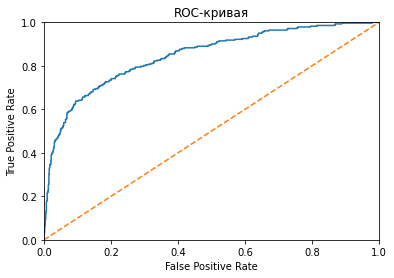

In [33]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print(f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

A very good result was obtained. The target F1=0.59 is exceeded. The AUC-ROC value increased slightly.

Now let's fight the imbalance with downsampling using a similar principle to the one described above.

0.5628272251308901
0.8547414340389254


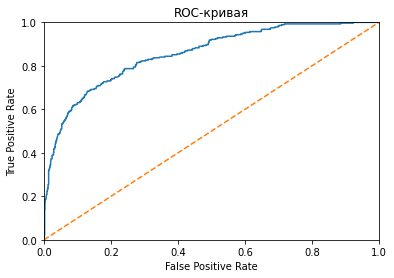

In [34]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print(f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Even though the AUC-ROC value has increased, the F1 has decreased significantly. This is no good. We will use upsampling.

Now let's look at the logistic regression model with up- and downsampling.

0.4993788819875776
0.7911217524320859


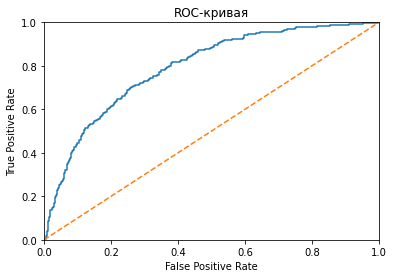

In [35]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000) 
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print(f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

0.49757281553398053
0.7891748743900892


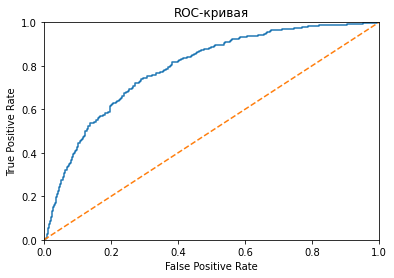

In [36]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000) 
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print(f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
print(roc_auc_score(target_valid, probabilities_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

F1 has grown considerably here, but still less than the random forest model. You can also see that upsampling is more effective at dealing with class imbalance.

**Conclusion:** Combating class imbalance with upsampling is the most effective. The goal is reached, and we can start testing.

## Model testing

Let's test using the best random forest model by the study results with a maximum depth of 15 and upsampling. We will measure F1 and AUC-ROC.

0.5988538681948423
0.8515129427156342


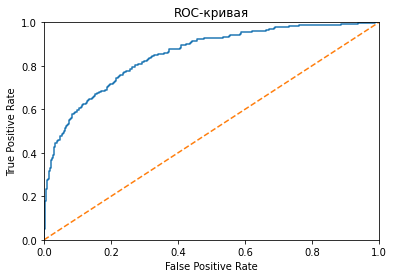

In [37]:
model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)

print(f1_score(target_test, predicted_test))

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
print(roc_auc_score(target_test, probabilities_one_test))

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

**Conclusion:** Testing with the most efficient machine learning model and upsampling achieved the target value of F1=0.59. Thus, our goal is achieved.

## Conclusion

The project's main goal was to develop a machine learning model that can help Beta Bank predict customer behavior, specifically whether a customer will leave the bank or not.  The F1 metric should reach 0.59.

The data for the development of the model were the characteristics of clients, including their gender, residence, as well as financial indicators.

The target feature was the fact of the client leaving the bank - yes or no.

The study found that the best model for the bank-provided data is the random forest model, with a maximum depth of 15. Also, the best F1 index is achieved when the data are processed using upsampling.